In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "hotel-booking-demand" "hotel-bookingscsv"

In [2]:
install.packages("tidyverse")
install.packages("ggplot2")
library(tidyverse)
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
hotel_bookings <- read.csv("../input/hotel-bookingscsv/hotel_bookings.csv")

In [4]:
#view the data
head(hotel_bookings)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,⋯,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>
1,Resort Hotel,no,342,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,7/1/2015
2,Resort Hotel,no,737,2015,July,27,1,0,0,2,⋯,No Deposit,NULL,NULL,0,Transient,0,0,0,Check-Out,7/1/2015
3,Resort Hotel,no,7,2015,July,27,1,0,1,1,⋯,No Deposit,NULL,NULL,0,Transient,75,0,0,Check-Out,7/2/2015
4,Resort Hotel,no,13,2015,July,27,1,0,1,1,⋯,No Deposit,304,NULL,0,Transient,75,0,0,Check-Out,7/2/2015
5,Resort Hotel,no,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,7/3/2015
6,Resort Hotel,no,14,2015,July,27,1,0,2,2,⋯,No Deposit,240,NULL,0,Transient,98,0,1,Check-Out,7/3/2015


In [5]:
#show the name of the columns
colnames(hotel_bookings)


[1] "hotel"                          "is_canceled"                   
 [3] "lead_time"                      "arrival_date_year"             
 [5] "arrival_date_month"             "arrival_date_week_number"      
 [7] "arrival_date_day_of_month"      "stays_in_weekend_nights"       
 [9] "stays_in_week_nights"           "adults"                        
[11] "children"                       "babies"                        
[13] "meal"                           "country"                       
[15] "market_segment"                 "distribution_channel"          
[17] "is_repeated_guest"              "previous_cancellations"        
[19] "previous_bookings_not_canceled" "reserved_room_type"            
[21] "assigned_room_type"             "booking_changes"               
[23] "deposit_type"                   "agent"                         
[25] "company"                        "days_in_waiting_list"          
[27] "customer_type"                  "adr"                           
[29] "required_car_parking_spaces"    "total_of_special_requests"     
[31] "reservation_status"             "reservation_status_date"

In [6]:
#show the str of the data
str(hotel_bookings)


'data.frame':	119390 obs. of  32 variables:
 $ hotel                         : chr  "Resort Hotel" "Resort Hotel" "Resort Hotel" "Resort Hotel" ...
 $ is_canceled                   : chr  "no" "no" "no" "no" ...
 $ lead_time                     : int  342 737 7 13 14 14 0 9 85 75 ...
 $ arrival_date_year             : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ arrival_date_month            : chr  "July" "July" "July" "July" ...
 $ arrival_date_week_number      : int  27 27 27 27 27 27 27 27 27 27 ...
 $ arrival_date_day_of_month     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_weekend_nights       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stays_in_week_nights          : int  0 0 1 1 2 2 2 2 3 3 ...
 $ adults                        : int  2 2 1 1 2 2 2 2 2 2 ...
 $ children                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ babies                        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ meal                          : chr  "BB" "BB" "BB" "BB" ...
 $ country                 

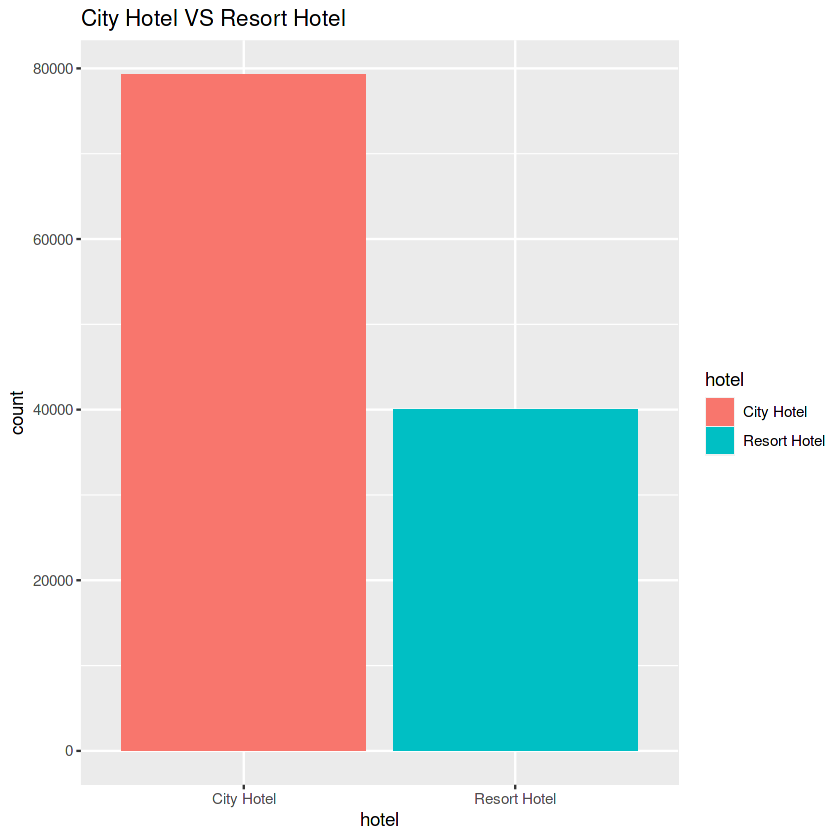

In [7]:
#creat bar chart view the most visited hotle
ggplot(data = hotel_bookings,aes(hotel,fill=hotel))+
  geom_bar()+
  labs(title = "City Hotel VS Resort Hotel")

As we can see the **city hotel** has more visitors than **resort hotel**

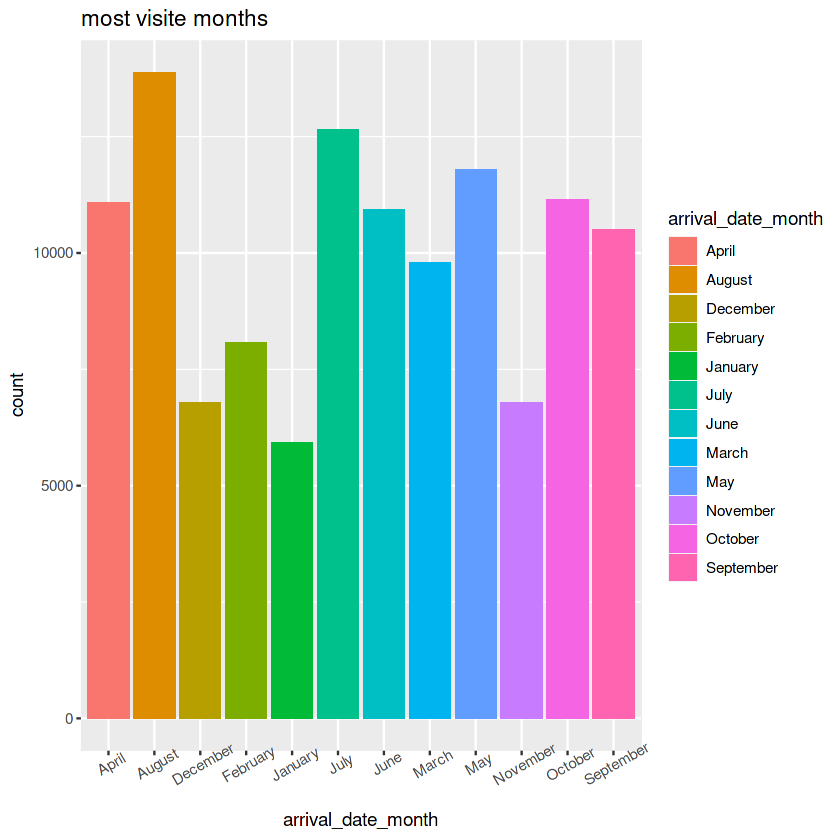

In [8]:
#use bar chart to view The most visited months
ggplot(data = hotel_bookings,aes(arrival_date_month,fill=arrival_date_month))+
  geom_bar()+
  theme(axis.text.x=element_text(angle =  30 ))+
  labs(title = "most visite months")

**August** is The most crowded month 

****Recommendation
**The manager must increase the ads in **August**


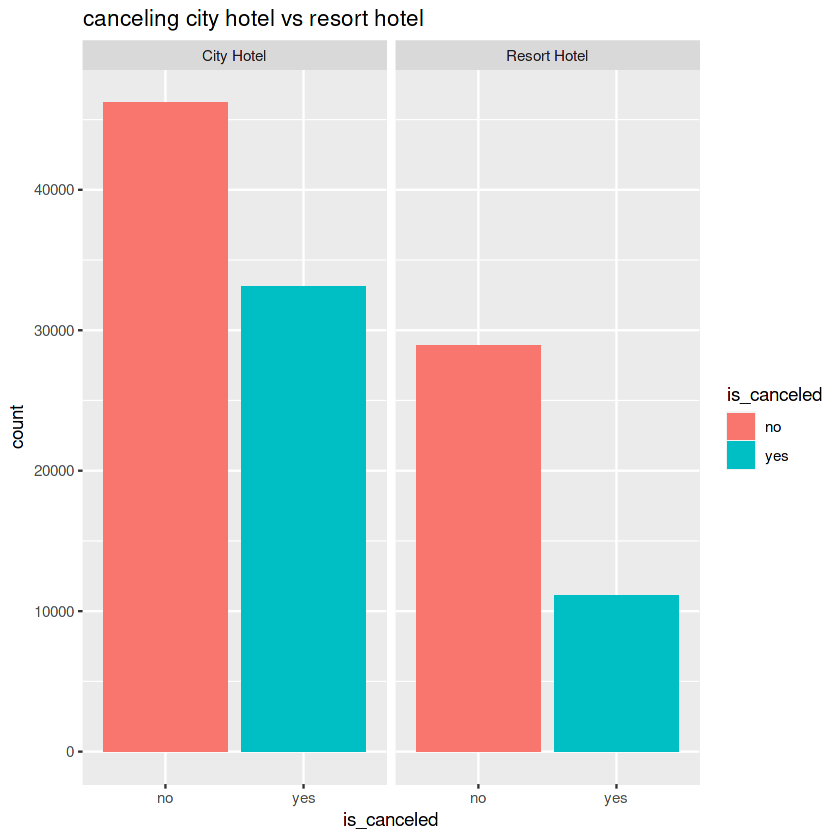

In [9]:
#the caneceling in city hotel and resort hotel
ggplot(data = hotel_bookings,aes(is_canceled,fill=is_canceled ))+
geom_bar( ) +
  facet_wrap(~hotel)  +
  labs(title = "canceling city hotel vs resort hotel")


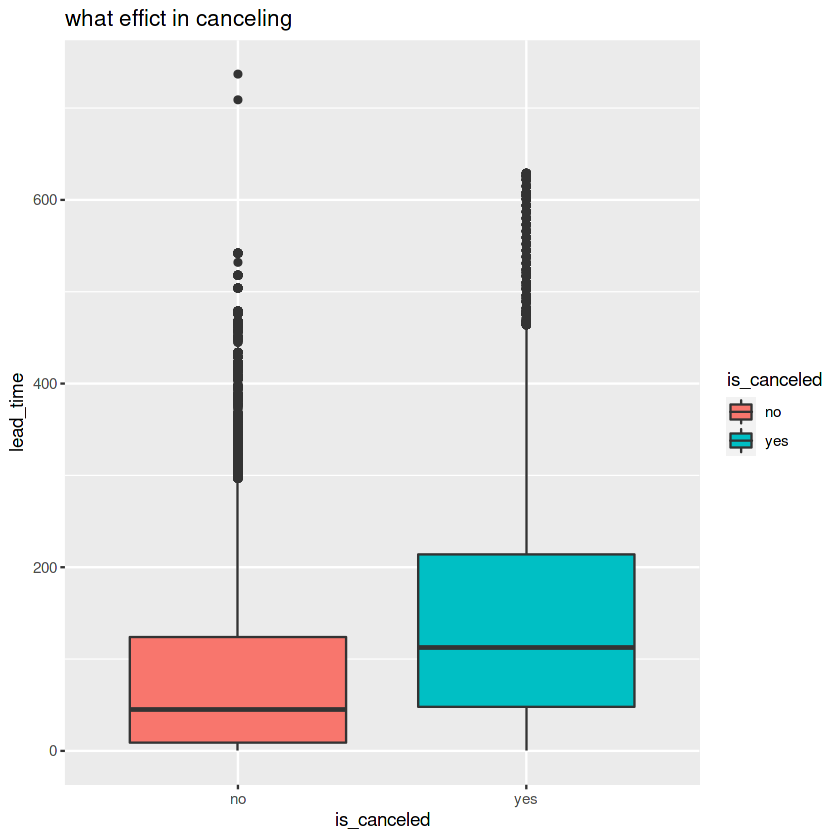

In [10]:
#what effict in canceling
ggplot(data =  hotel_bookings,aes(x=is_canceled,y=lead_time,fill=is_canceled))+
  geom_boxplot()+
  labs(title = "what effict in canceling")

as we see **lead_time** effict in **canceling**

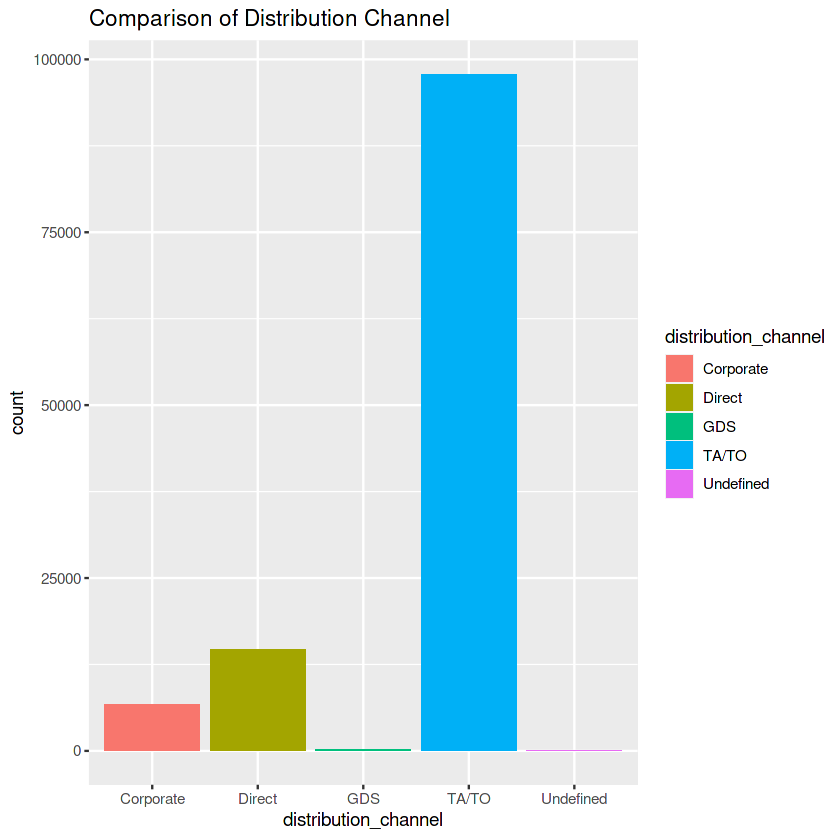

In [11]:
#what is the most distribution channel
ggplot(data = hotel_bookings,aes(x=distribution_channel,fill=distribution_channel))+
  geom_bar()+
  labs(title = "Comparison of Distribution Channel")

1. **TA** meaning Travel Agents
2. **TO** meaning Tour Operators 
> the most popular distribution_channel is **TA/TO**



# **Recommendation**
The manager should take care of TA/TO

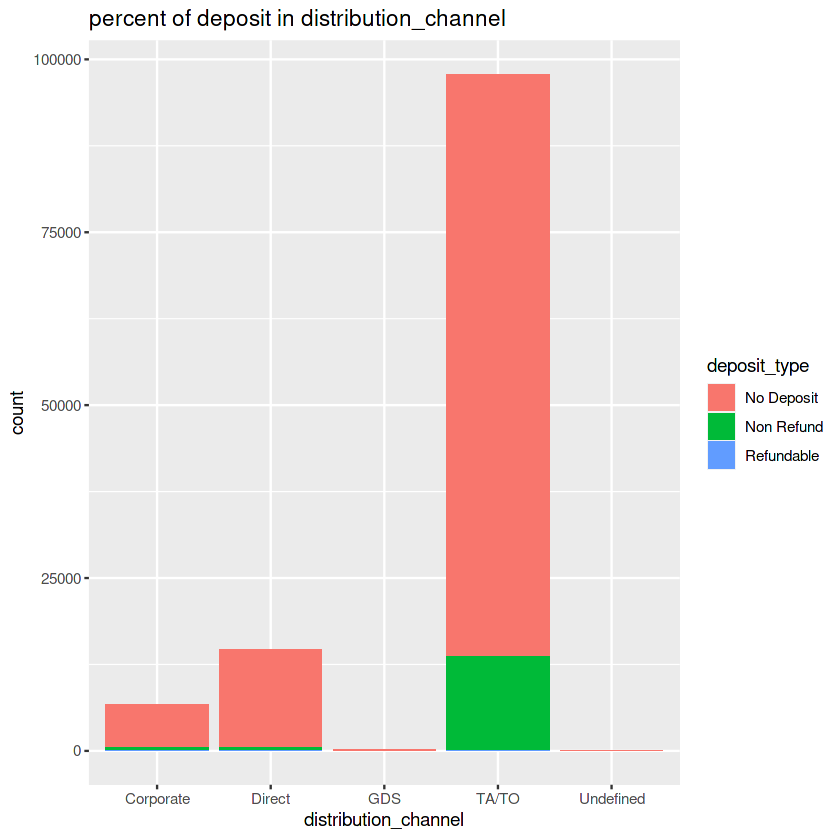

In [12]:
#deposit to guarantee the bookin accourding distribution_channel
ggplot(data = hotel_bookings,aes(x=distribution_channel,fill=deposit_type))+
  geom_bar()+
  labs(title = "percent of deposit in distribution_channel")
  

# We will make deeply into the analysis

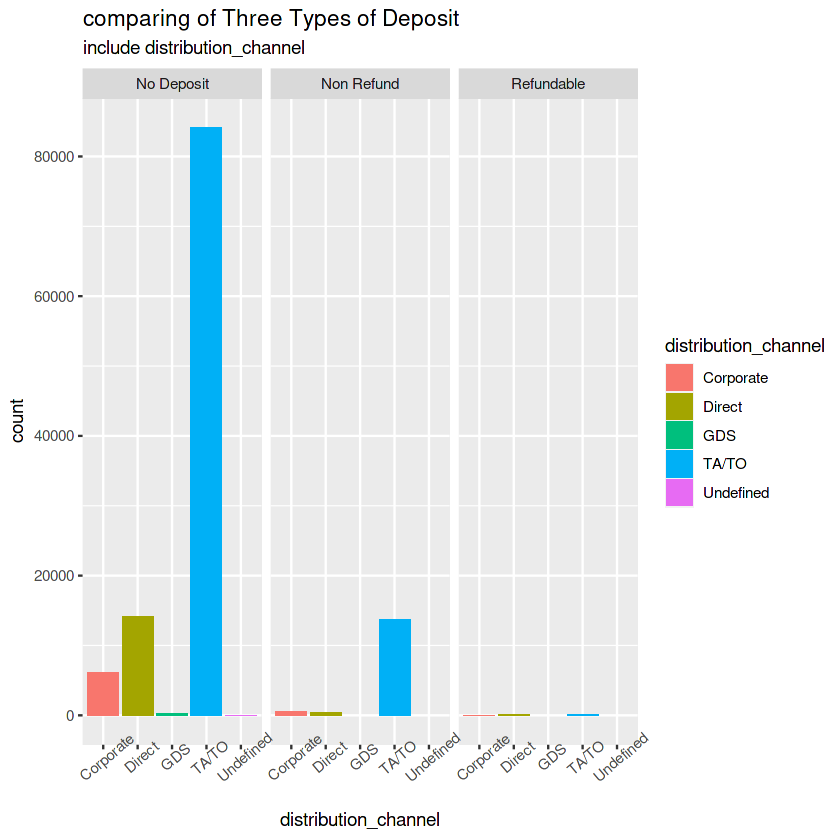

In [13]:
ggplot(data = hotel_bookings,aes(x=distribution_channel,fill=distribution_channel))+
  facet_wrap(~deposit_type)+
  geom_bar()+
  theme(axis.text.x = element_text(angle = 40))+
  labs(title="comparing of Three Types of Deposit",subtitle = "include distribution_channel")
  

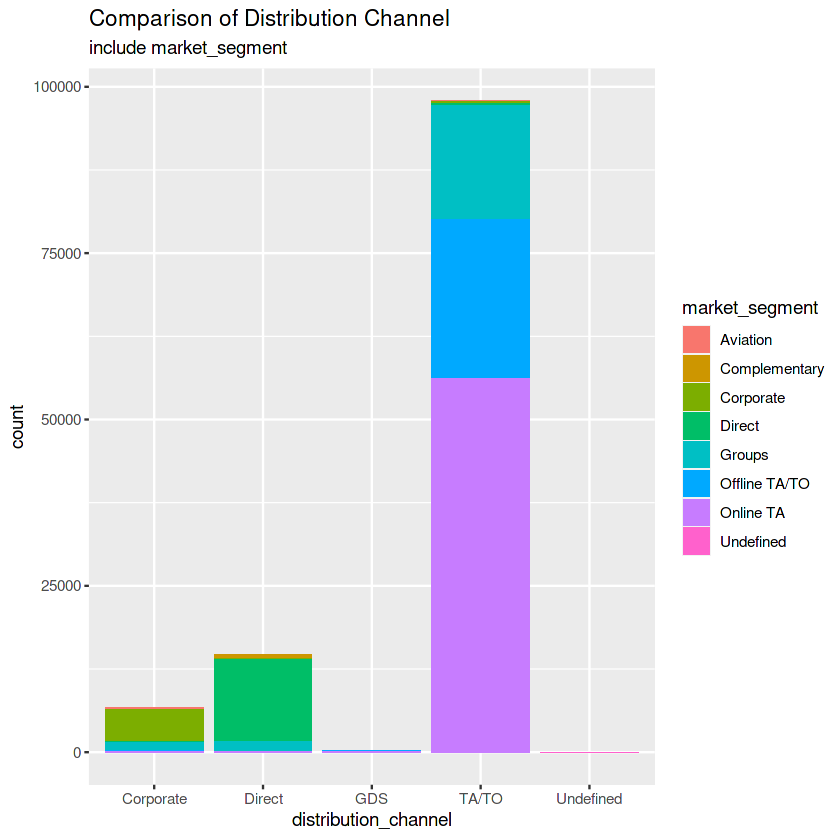

In [14]:
#type of market_segment according to distribution_channel
ggplot(data = hotel_bookings,aes(x=distribution_channel,fill=market_segment))+
  geom_bar()+
  labs(title = "Comparison of Distribution Channel ",subtitle = "include market_segment")

the most popular **market_segment** is **online TA**

# **Recommendation**
 **The manager must take care of the **online TA ** Management also needs to ensure that online booking channels are reliable and available **

# **Conclusion**
1. the most arrival_date_month is **August** 
2. the **city hotel** is more booking than **resort hotel**
3. **TA/TO** is the most booking **distribution_channel**
4. **onloneTA** the Customers prefer **market_segment**

# **Final Recommendation**
**to send the promotion to families that make online bookings for the city hotels.**